In [1]:
import json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
def study_exp(exp_name):
  with open(f"agents_runs_{exp_name}.json") as f:
    data = json.load(f)
  return data[list(data.keys())[0]]

In [3]:
data = study_exp("figure_8")

In [4]:
scores_per_agent_per_scenarios = []
for k1 in data.keys():
  for k2 in data[k1].keys():
    for k3 in data[k1][k2].keys():
      scores_per_agent_per_scenarios.append(data[k1][k2][k3]["scores"])
scores_per_agent_per_scenarios = np.array(scores_per_agent_per_scenarios)

In [5]:
scores_set_agents = np.load("scores_set_agents.npy")

In [8]:
min_agents = scores_per_agent_per_scenarios.min(axis=0)
max_agents = scores_per_agent_per_scenarios.max(axis=0)
best_agent = scores_per_agent_per_scenarios[scores_per_agent_per_scenarios.mean(axis=1).argmax()]

mean_agent = scores_set_agents.mean()
mean_best_agent = best_agent.mean()

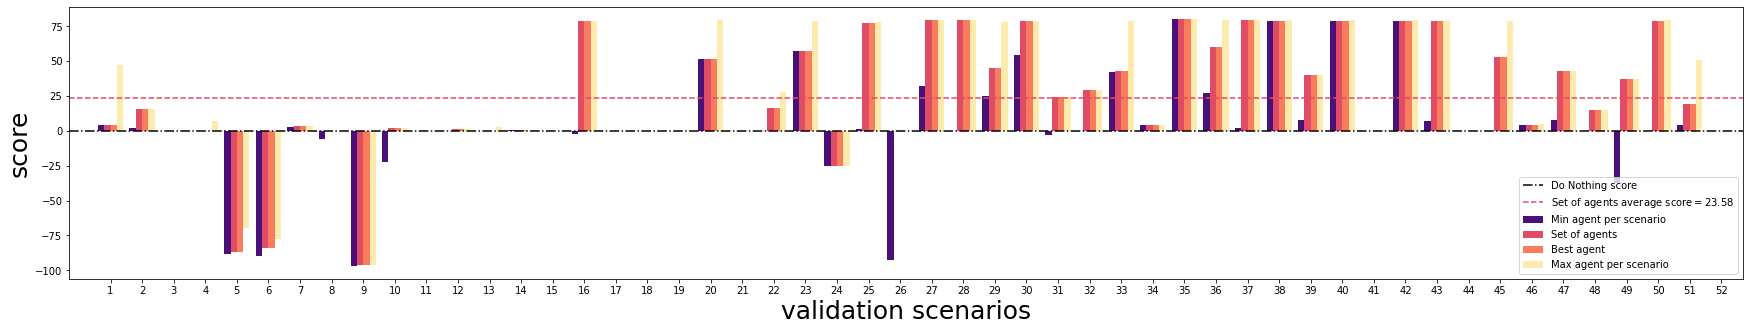

In [24]:
scenarios = np.array(range(1, scores_set_agents.shape[0]+1))
width = 0.2
plt.figure(figsize=(30, 5))
plt.bar(scenarios, min_agents, width, label="Min agent per scenario", color="#491078")
plt.bar(scenarios+width, scores_set_agents, width, label="Set of agents", color="#e14c65")
plt.bar(scenarios+width*2, best_agent, width, label="Best agent", color="#f97c5d")
plt.bar(scenarios+width*3, max_agents, width, label="Max agent per scenario", color="#fcebad")
plt.axhline(0, label=f"Do Nothing score", color="black", linestyle='dashdot')
plt.axhline(mean_agent, label=f"Set of agents average score$={mean_agent:.2f}$", linestyle="--", color="#e14c65")
plt.ylabel("score", fontsize=25)
plt.xlabel("validation scenarios", fontsize=25)
plt.xticks(scenarios+1.5*width, scenarios)
plt.xlim((0, scenarios[-1]+1))
_=plt.legend()
plt.savefig("fig_set-agents.pdf")